# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

Available models: RandomForest, SVC, kNN
Model set to: RandomForestClassifier
Starting hyperparameter tuning...
Best Parameters found: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
Training complete.
Model Accuracy: 0.9739884393063584

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346



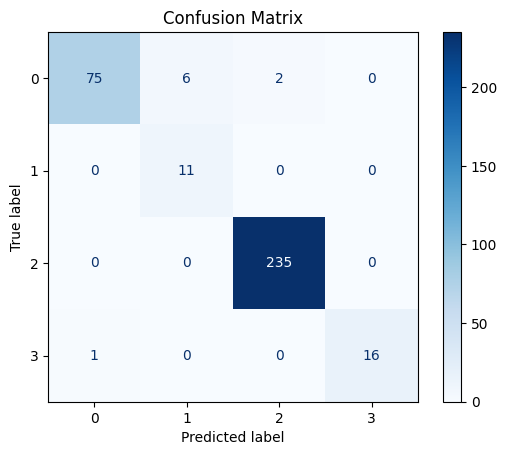

Mean Squared Error: 0.0665


In [2]:

class CarEvaluationClassifier:
    def __init__(self, DataFrame):
        self.current_model = None
        self.encoder = LabelEncoder()
        self.scaler = StandardScaler()
        # Encode all columns
        for column in DataFrame.columns:
            DataFrame[column] = DataFrame[column].astype(str)  # Convert values to strings
            DataFrame[column] = self.encoder.fit_transform(DataFrame[column])
        self.data = DataFrame.iloc[:, :-1]
        self.target = DataFrame.iloc[:, -1]

    def prepare_data(self, test_size=0.2):
        self.data_train, self.data_test, self.target_train, self.target_test = train_test_split(
            self.data, self.target, test_size=test_size, random_state=42
        )

    def set_model(self, model):
        self.current_model = model
        print(f"Model set to: {type(model).__name__}")

    def hyperparameter_tuning(self, param_grid):
        if self.current_model is None:
            raise ValueError("No model selected. Use the 'set_model' method to select a model first.")

        print("Starting hyperparameter tuning...")
        self.grid_search = GridSearchCV(estimator=self.current_model, param_grid=param_grid, cv=5, scoring='accuracy')
        self.grid_search.fit(self.data_train, self.target_train)

        # Update the model with the best parameters
        self.current_model = self.grid_search.best_estimator_
        print("Best Parameters found:", self.grid_search.best_params_)

    def train(self):
        if self.current_model is None:
            raise ValueError("No model selected. Use the 'set_model' method to select a model first.")
        self.current_model.fit(self.data_train, self.target_train)
        print("Training complete.")

    def evaluate(self):
        if self.current_model is None:
            raise ValueError("No model selected. Use the 'set_model' method to select a model first.")
        self.target_pred = self.current_model.predict(self.data_test)
        accuracy = accuracy_score(self.target_test, self.target_pred)
        report = classification_report(self.target_test, self.target_pred)
        print("Model Accuracy:", accuracy)
        print("\nClassification Report:\n", report)

    def display_confusion_matrix(self):
        cm = confusion_matrix(self.target_test, self.target_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues")
        plt.title("Confusion Matrix")
        plt.show()

    def calculate_mse(self):
        mse = mean_squared_error(self.target_test, self.target_pred)
        print(f"Mean Squared Error: {mse:.4f}")
        return mse

class RandomForestModel(CarEvaluationClassifier):
    def __init__(self, DataFrame):
        super().__init__(DataFrame)
        self.model = RandomForestClassifier()
        self.param_grid = {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "random_state": [42],
        }

class SVCModel(CarEvaluationClassifier):
    def __init__(self, DataFrame):
        super().__init__(DataFrame)
        self.model = SVC()
        self.param_grid = {
            "C": [0.1, 1.0, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"],
        }

class KNNModel(CarEvaluationClassifier):
    def __init__(self, DataFrame):
        super().__init__(DataFrame)
        self.model = KNeighborsClassifier()
        self.param_grid = {
            "n_neighbors": range(1, 20),
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan", "minkowski"],
            "p": [1, 2],
        }

# Load the data
filepath = "car.data"
data = pd.read_csv(filepath, header=None)

# User selects a model
print("Available models: RandomForest, SVC, kNN")
selected_model = input("Enter the model name you want to use: ")

# Create and use the selected model
try:
    if selected_model == "RandomForest":
        model = RandomForestModel(data)
    elif selected_model == "SVC":
        model = SVCModel(data)
    elif selected_model == "kNN":
        model = KNNModel(data)
    else:
        raise ValueError("Invalid model name entered.")

    model.prepare_data()
    model.set_model(model.model)
    model.hyperparameter_tuning(model.param_grid)
    model.train()
    model.evaluate()
    model.display_confusion_matrix()
    model.calculate_mse()

except ValueError as e:
    print(e)